In [1]:
from pycromanager import Core
from time import sleep
import numpy as np

core = Core(convert_camel_case=False)
bridge = core._get_bridge() # get the Java bridge to create Java SLM sequence
# Create a Java array list to hold the sequence with the flattened images
         
dmd_name = core.getSLMDevice()
slm_width = core.getSLMWidth(dmd_name)
slm_height = core.getSLMHeight(dmd_name)
print("Detected SLM: " + dmd_name + " with resolution: " + str(slm_width) + "x" + str(slm_height))



Detected SLM: MightexPolygon1000 with resolution: 912x1140


In [2]:
# randomize the input image array acording to input index vector (randomize the order of the images)
def randomize_image_array(DMDArray, rand_vector):
    
    DMDRandArray = [None] * len(DMDArray)
    Randjavaarray = bridge._construct_java_object('java.util.ArrayList')
    Randjavaarray.clear()

    # Place each image in its new position
    for original_idx, new_idx in enumerate(rand_vector):
        DMDRandArray[original_idx] = DMDArray[new_idx]
        print("DMDArray type: ", type(DMDArray[new_idx]))
        Randjavaarray.add(DMDArray[new_idx].ravel()) # add the flatten image to the java array list
    
    return Randjavaarray, DMDRandArray


In [3]:
# create the image array
import os
import cv2
import matplotlib.pyplot as plt


DMD_dir = r"D:\DATA\Patterns\Test_DO_NOT_DELETE\Nums"
#DMD_dir = r"D:\DATA\Patterns\Test_DO_NOT_DELETE\DMD"
DMD_files = os.listdir(DMD_dir)
sorted_file_names = sorted(DMD_files, key=lambda x: int(x.split(".")[0]))

numimages = 9
# numimages = len(sorted_file_names)


DMDArray = []
DMDRandArray = []
image = None

for num, filen in enumerate(sorted_file_names): # num starts at 0
    if filen.endswith(".bmp"):
        if num < numimages:
            
            # read the image and append
            image = cv2.imread(os.path.join(DMD_dir, filen), cv2.IMREAD_GRAYSCALE)
            # append the image to the array
            DMDArray.append(image)

        else:
            break

# create a random vector to randomize the order of the images
rand_vector = np.random.choice(range(len(DMDArray)), len(DMDArray), replace=False).tolist()


DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
DMDArray type:  <class 'numpy.ndarray'>
imageIndex 3 is similar to 3
num: 3 located at index: 0


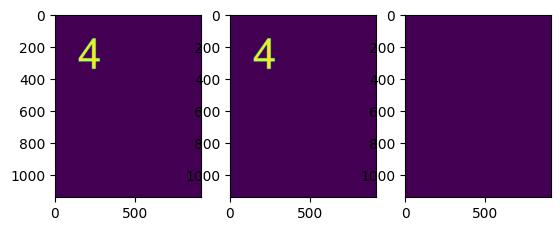

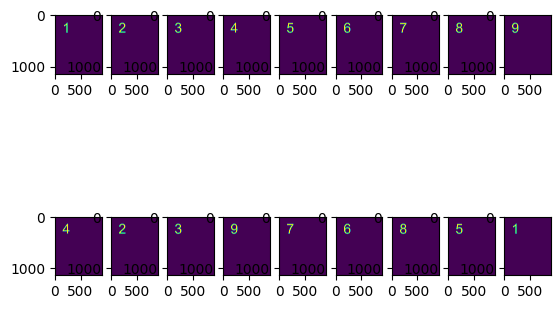

randvector [3, 1, 2, 8, 6, 5, 7, 4, 0]


In [4]:


Randjavaarray, DMDRandArray = randomize_image_array(DMDArray, rand_vector)

# finds where the number "0" is in the rand_vector
#randArray0 = np.where(rand_vector == 0)
imageIndex = 3 # the index to look for
randArray0_index = rand_vector.index(imageIndex)
print("imageIndex", imageIndex, "is similar to", rand_vector[randArray0_index])
print("num:", imageIndex, 'located at index:', randArray0_index)

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# plot the first image in the DMDArray
ax1.imshow(DMDArray[imageIndex])
# plot the image in the DMDRandArray at the index of randArray0
ax2.imshow(DMDRandArray[randArray0_index])   # randArray0[0][0]
# plot in ax3 the difference between the two images
ax3.imshow(DMDArray[imageIndex] - DMDRandArray[randArray0_index])

# Sanity check
# plot all images in DMDArray in one row and below it the DMDRandArray in second row
fig, (ax1, ax2) = plt.subplots(2, numimages)
for i in range(numimages):
    ax1[i].imshow(DMDArray[i])
    ax2[i].imshow(DMDRandArray[i])
plt.show()
print("randvector", rand_vector)


In [ ]:
# load new random sequence to the SLM
def Load_SLM_Rand_Seq(DMDArray):
    
    rand_vector = np.random.choice(range(len(DMDArray)), len(DMDArray), replace=False).tolist()
    Randjavaarray, DMDRandArray = randomize_image_array(DMDArray, rand_vector)
    # load sequence to SLM
    core.loadSLMSequence(dmd_name, Randjavaarray)
    # start sequence
    core.startSLMSequence(dmd_name)



    

In [ ]:
# play the sequence in the SLM
from time import sleep

# rand_vector = np.random.choice(range(len(DMDArray)), len(DMDArray), replace=False).tolist()
# print("rand_vector", rand_vector)
# #print("image shape", DMDArray[0].shape)
# print("DMDArray length", len(DMDArray))
# # rearrange the images in the array according to the random vector
# Randjavaarray, DMDRandArray = randomize_image_array(DMDArray, rand_vector)
# print("Randjavaarray length", Randjavaarray.size()) # each row corresponds to one flatten image


# # load sequence to SLM
# core.loadSLMSequence(dmd_name, Randjavaarray)
# # start sequence
# core.startSLMSequence(dmd_name)



cnt = 8
loops = 8
allcount = 0
sleep_time = 1
# measure the time it takes to run the loop
import time
start = time.time()


# loop through cnt*loops times
for i in range(loops): # starts from 0
	# create and load new random sequence to the SLM
	Load_SLM_Rand_Seq(DMDArray)
	for counter in range(cnt):
		allcount += 1

		# sleep for 1 second
		
		core.displaySLMImage(dmd_name)
		sleep(sleep_time)
		print("count :" + str(counter), "loop", str(i))
	core.stopSLMSequence(dmd_name)
	# sleep for 1 second
	# sleep(1)
	# core.displaySLMImage(dmd_name)
	

# measure the end time
end = time.time()
# calculate the total time it took to run the loop
print("total time:", end - start)

# theoretical time it should take to run the loop
theoretical_time = cnt * loops * sleep_time
print("theoretical time:", theoretical_time)





In [ ]:
# java array manipulations

# import java.util.ArrayList;
# import java.util.Collections;

        # Add the flattened image to the Java array list
        #DMDjavaarray.add(image.ravel())
        # print the number of rows in the java array list
        #print("randnum type", type(int(rand_vector[num])))
        #Randjavaarray.set(int(rand_vector[num]), image.ravel())


# Remove the first image in the array
#DMDjavaarray.remove(10) # might not work - the array size is not changing
# print the length of the array
#print("Number of images", DMDArray.size())
# set the first image in the second vector of the arrray
# vectorToReplace = 4
# a = DMDjavaarray.set(vectorToReplace, DMDjavaarray.get(0))
# print(len(a)) 

